# A. Exploratory Data Analysis

## 1. Data Preparation and Sanity Check

### 1.1 Library and data Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path1 = 'utilities_disconnection.csv'
dataset = pd.read_csv(path1, delimiter = ';')

In [3]:
dataset.shape

(618346, 16)

### 1.2 Data description

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618346 entries, 0 to 618345
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   client_id                618346 non-null  int64 
 1   regional                 618346 non-null  int64 
 2   site                     618346 non-null  int64 
 3   client_class             618346 non-null  int64 
 4   client_subclass          618346 non-null  int64 
 5   connection_type          618346 non-null  object
 6   connection_status        618346 non-null  object
 7   installment_value        618346 non-null  object
 8   installment_status       247561 non-null  object
 9   total_debt               618346 non-null  object
 10  total_bills              618346 non-null  int64 
 11  disconnection_date       618346 non-null  object
 12  disconnection_requested  618346 non-null  object
 13  contractor_id            618346 non-null  object
 14  disconnection_execut

##### Data Description
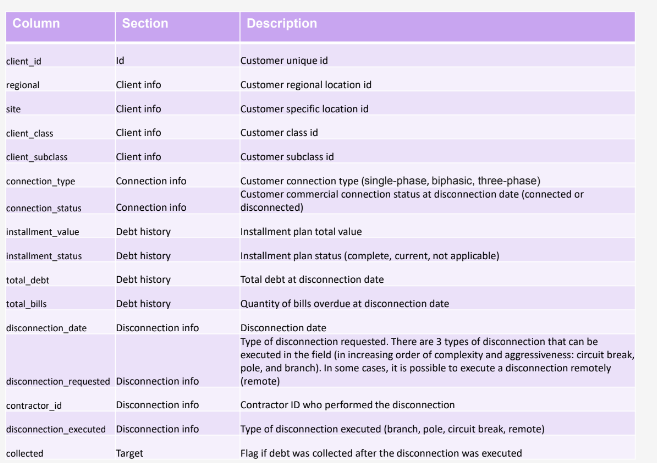

In [5]:
dataset.head()

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,0,1,13414,1,7,single-phase connection,disconnected,"252,39",complete,"662,62",4,2017-03-06,circuit_break,"66,0",circuit_break,"0,0"
1,1,1,14071,1,1,single-phase connection,disconnected,"0,0",NaN,"1202,45",17,2017-03-31,circuit_break,"73,0",circuit_break,"0,0"
2,2,1,12380,1,1,biphasic connection,disconnected,"0,0",NaN,"352,56",1,2017-03-20,circuit_break,"20,0",circuit_break,"0,0"
3,3,1,14071,1,1,biphasic connection,disconnected,"1317,25",complete,"699,23",9,2017-03-29,pole,"73,0",pole,"0,0"
4,4,2,22212,1,1,biphasic connection,disconnected,"2172,29",complete,"484,1",4,2017-03-16,pole,"156,0",circuit_break,"0,0"


In [6]:
dataset.describe()

,client_id,regional,site,client_class,client_subclass,total_bills
count,6.183460e+05,618346.000000,618346.000000,618346.000000,618346.000000,618346.000000
mean,4.079352e+05,2.368648,25879.205620,1.155804,1.475134,2.477576
std,3.150273e+05,1.131973,11393.975564,0.572867,1.744205,4.479946
min,0.000000e+00,1.000000,11170.000000,1.000000,1.000000,1.000000
25%,1.412260e+05,1.000000,14071.000000,1.000000,1.000000,1.000000
50%,3.214895e+05,2.000000,21081.000000,1.000000,1.000000,1.000000
75%,6.306098e+05,4.000000,41572.000000,1.000000,1.000000,2.000000
max,1.100749e+06,4.000000,45471.000000,7.000000,92.000000,167.000000


### 1.3 Null data manipulation

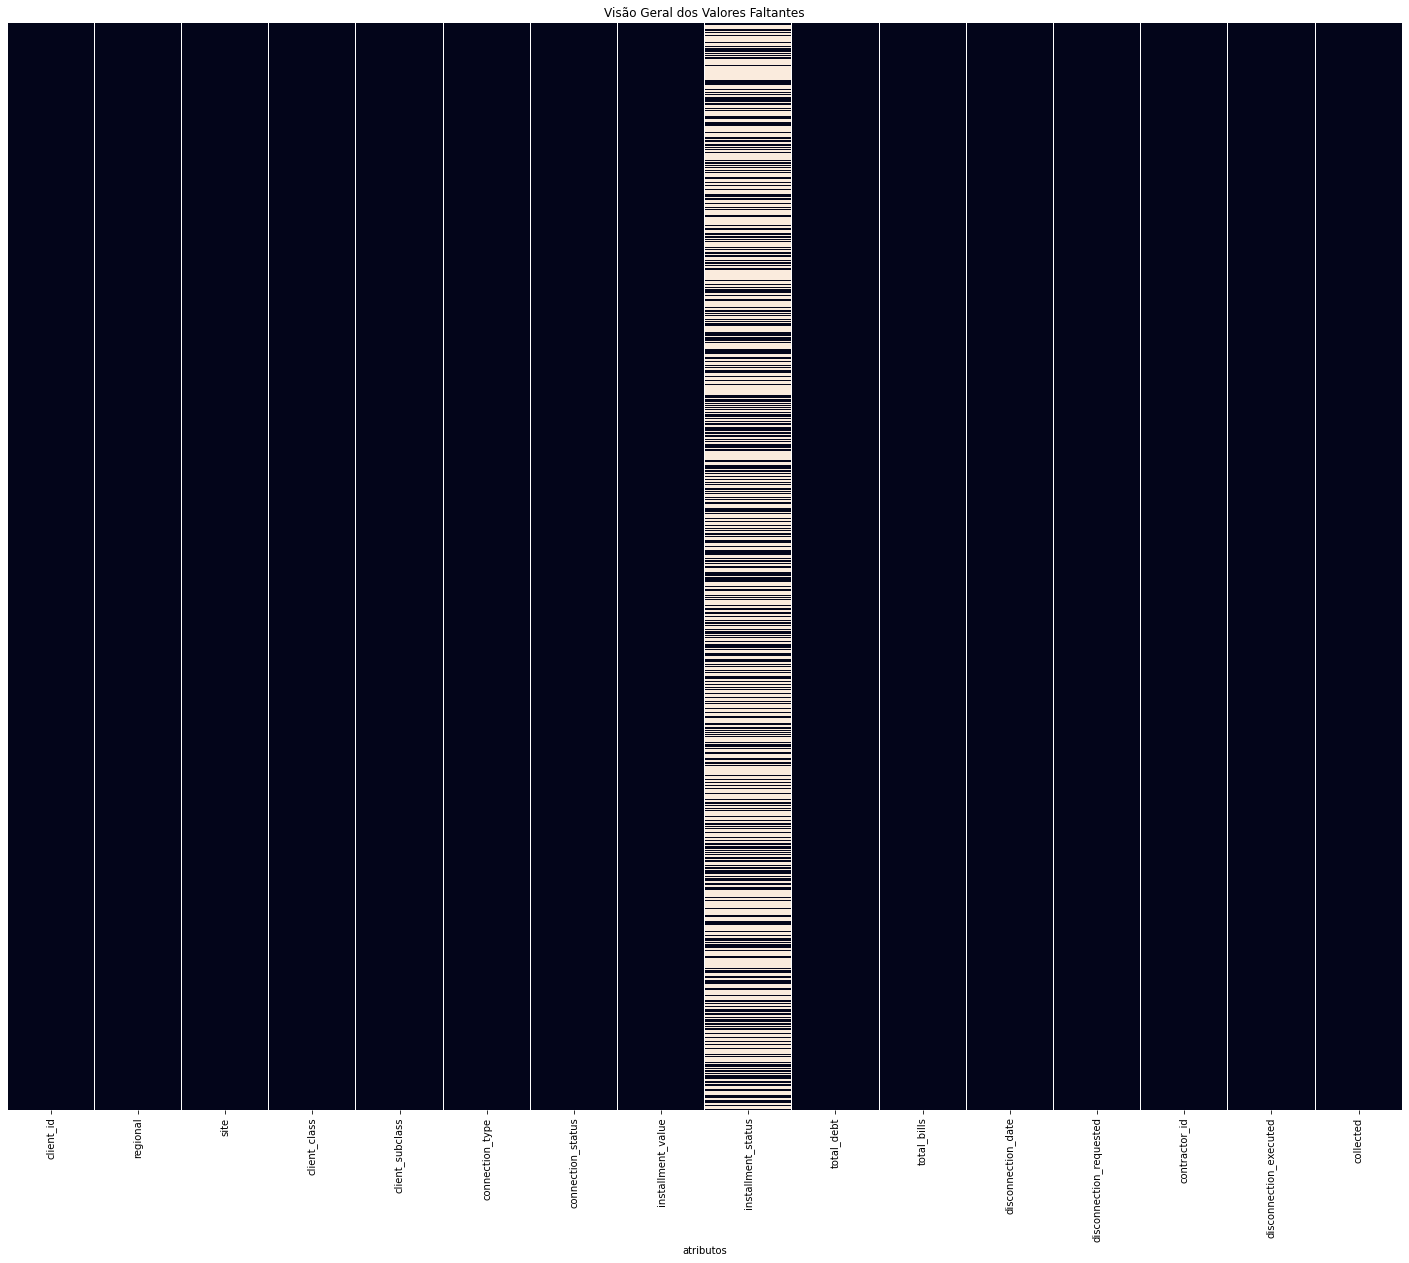

In [7]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset.isnull(),
           yticklabels=0,
           cbar=False)
plt.title('Visão Geral dos Valores Faltantes')
plt.xlabel('atributos')
plt.show()

In [8]:
dataset['installment_status'].value_counts()

complete    227701
current      19860
Name: installment_status, dtype: int64

##### Observations about null data
(1) installment_status have mostly null datas, but is possible indentify that this null data is equal Not Applicable, how is in description. 
This value is part of debt history, so could be important to model decision

In [9]:
#substituing the null value for "Not Aplicabble"
dataset['installment_status'].fillna("Not Aplicabble", inplace = True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618346 entries, 0 to 618345
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   client_id                618346 non-null  int64 
 1   regional                 618346 non-null  int64 
 2   site                     618346 non-null  int64 
 3   client_class             618346 non-null  int64 
 4   client_subclass          618346 non-null  int64 
 5   connection_type          618346 non-null  object
 6   connection_status        618346 non-null  object
 7   installment_value        618346 non-null  object
 8   installment_status       618346 non-null  object
 9   total_debt               618346 non-null  object
 10  total_bills              618346 non-null  int64 
 11  disconnection_date       618346 non-null  object
 12  disconnection_requested  618346 non-null  object
 13  contractor_id            618346 non-null  object
 14  disconnection_execut

### 1.4 Categorical data

#### 1.4.1 Regional data

Text(0, 0.5, 'Bills Qty')

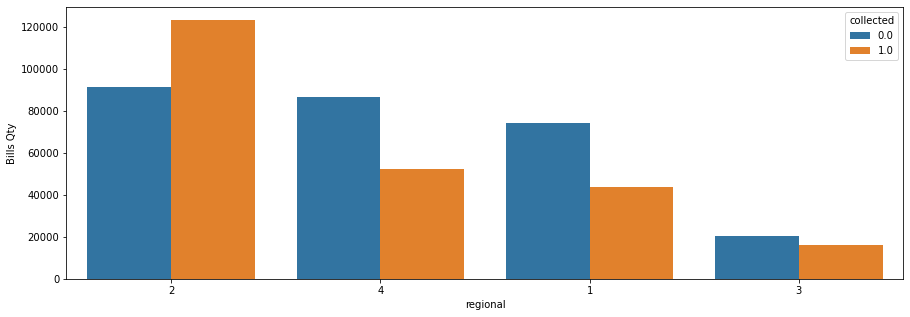

In [54]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='regional', hue= 'collected',
                data=dataset,
                order=dataset['regional'].value_counts().index)
graph.set_xlabel('regional')
graph.set_ylabel('Bills Qty')

1 - This is a kind of data that can be desconsidered, to avoid a regional determinism, but is possible see the difference between regions. 

In [12]:
dataset['regional'].value_counts()

2    249786
4    169266
1    154937
3     44357
Name: regional, dtype: int64

In [13]:
dataset['site'].value_counts()

21021    63600
41572    45827
21061    38048
14071    34526
14010    33670
         ...  
21029       13
33151       12
11193       10
13292        8
41302        7
Name: site, Length: 155, dtype: int64

#### 1.4.2 Class data

Text(0, 0.5, 'Bills Qty')

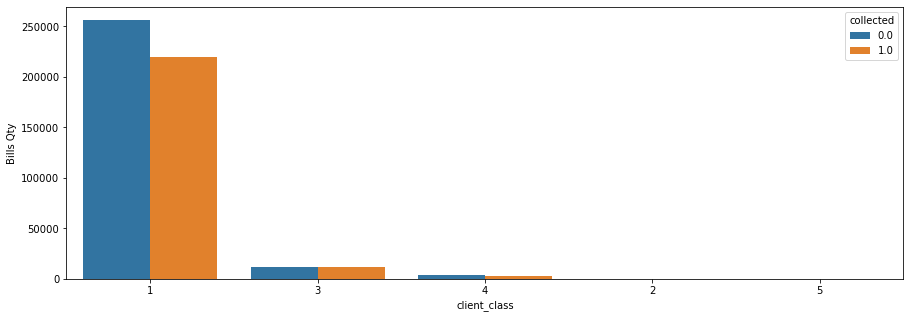

In [52]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='client_class',hue = 'collected',
                data=dataset,
                order=dataset['client_class'].value_counts().index)
graph.set_xlabel('client_class')
graph.set_ylabel('Bills Qty')

Text(0, 0.5, 'Bills Qty')

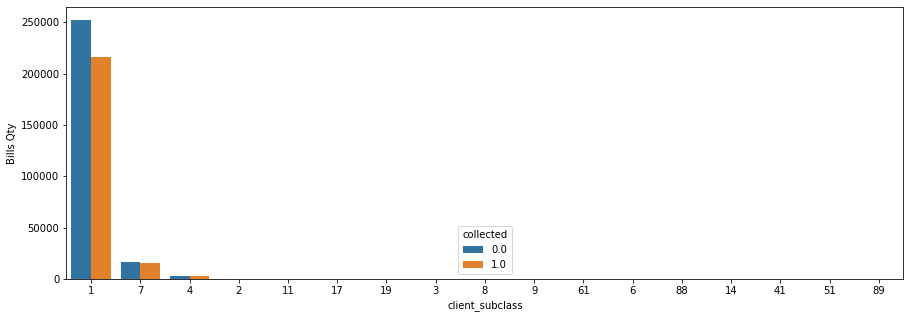

In [51]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='client_subclass',hue = 'collected',
                data=dataset,
                order=dataset['client_subclass'].value_counts().index)
graph.set_xlabel('client_subclass')
graph.set_ylabel('Bills Qty')

#### 1.4.3 connection data

Text(0, 0.5, 'Bills Qty')

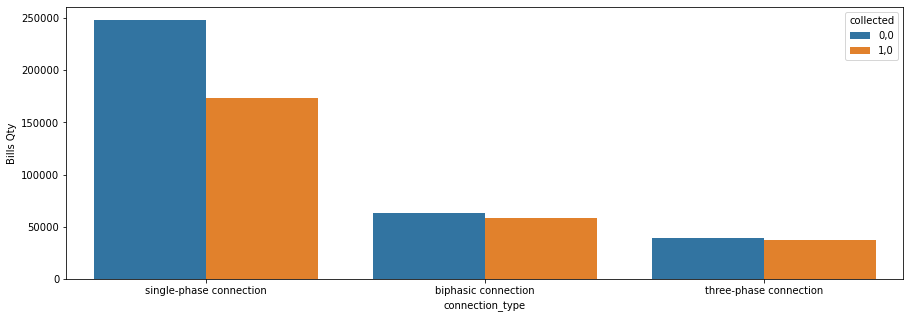

In [16]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='connection_type',hue = 'collected',
                data=dataset,
                order=dataset['connection_type'].value_counts().index)
graph.set_xlabel('connection_type')
graph.set_ylabel('Bills Qty')

In [17]:
dataset['connection_type_num'] = dataset['connection_type'].map({"single-phase connection":"1","biphasic connection":"2","three-phase connection":"3"})

## 1 - Single-phase
## 2 - biphasic
## 3 - three-phase

Text(0, 0.5, 'Bills Qty')

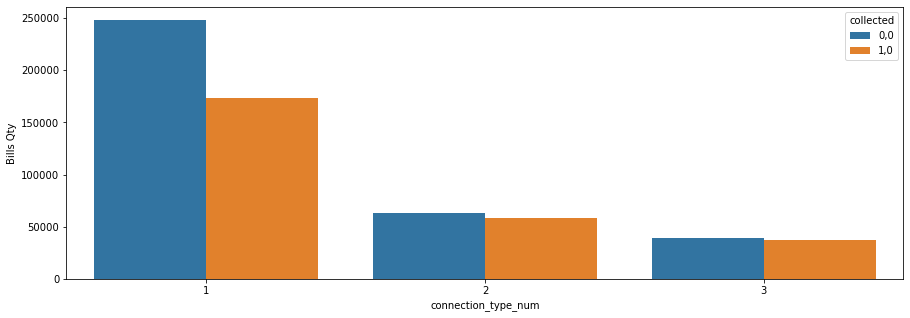

In [18]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='connection_type_num',hue = 'collected',
                data=dataset,
                order=dataset['connection_type_num'].value_counts().index)
graph.set_xlabel('connection_type_num')
graph.set_ylabel('Bills Qty')

Text(0, 0.5, 'Bills Qty')

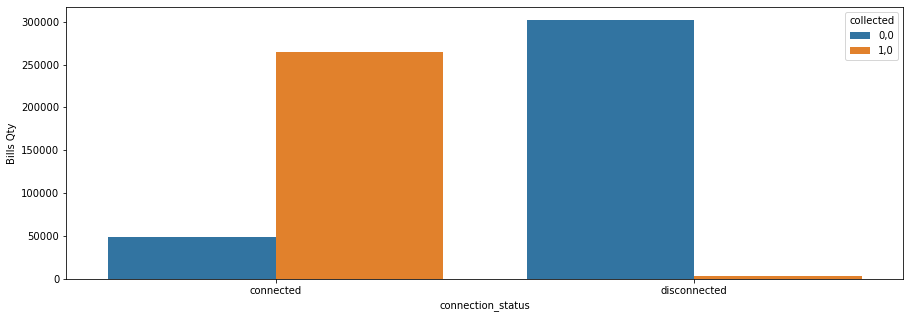

In [19]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='connection_status',hue = 'collected',
                data=dataset,
                order=dataset['connection_status'].value_counts().index)
graph.set_xlabel('connection_status')
graph.set_ylabel('Bills Qty')

In [20]:
#This is a category binary condition #homogeneous distribution
dataset['connection_status'].value_counts()

connected       313021
disconnected    305325
Name: connection_status, dtype: int64

In [21]:
dataset['connection_status_num'] =  dataset['connection_status'].map({"connected":"1","disconnected":"0"}).astype(int)

Text(0, 0.5, 'Bills Qty')

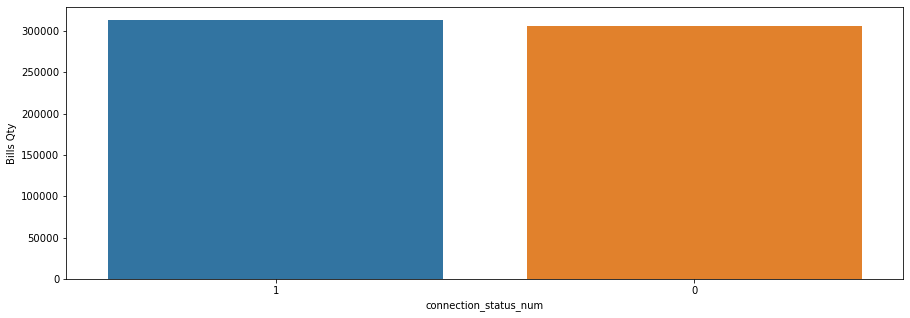

In [22]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='connection_status_num',
                data=dataset,
                order=dataset['connection_status_num'].value_counts().index)
graph.set_xlabel('connection_status_num')
graph.set_ylabel('Bills Qty')

#### 0 - connected
#### 1 - disconnected

In [23]:
for i in range(dataset['connection_status_num'].unique().shape[0]):
    neg=dataset[dataset['connection_status_num']==i]['collected'].value_counts()[0]
    pos=dataset[dataset['connection_status_num']==i]['collected'].value_counts()[1]
    total=pos+neg
    print("Bad debt by connection status",i," is : ",round(neg/total*100,2),"% || Absolut bad debt :",round(neg/dataset['connection_status'].shape[0]*100,2))

Bad debt by connection status 0  is :  98.86 % || Absolut bad debt : 48.82
Bad debt by connection status 1  is :  84.55 % || Absolut bad debt : 42.8


#### 1.4.4 installment data

Text(0, 0.5, 'Bills Qty')

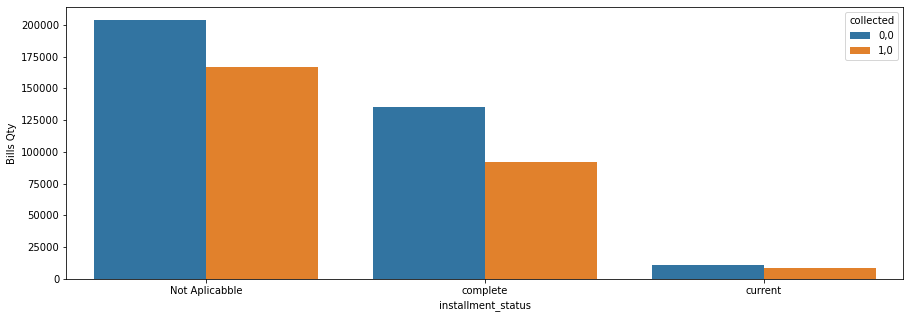

In [24]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='installment_status',hue = 'collected',
                data=dataset,
                order=dataset['installment_status'].value_counts().index)
graph.set_xlabel('installment_status')
graph.set_ylabel('Bills Qty')

In [25]:
dataset['installment_status_num'] =  dataset['installment_status'].map({"Not Aplicabble":"0","current":"1", "complete":"2"}).astype(int)

Text(0, 0.5, 'Bills Qty')

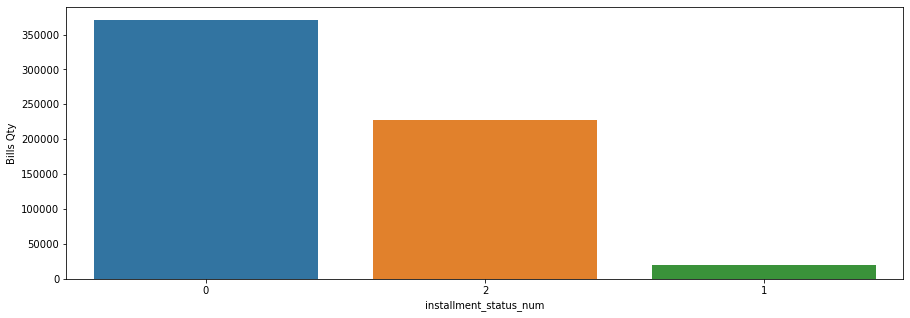

In [26]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='installment_status_num',
                data=dataset,
                order=dataset['installment_status_num'].value_counts().index)
graph.set_xlabel('installment_status_num')
graph.set_ylabel('Bills Qty')

#### 1.4.3 disconnection data

Text(0, 0.5, 'Bills Qty')

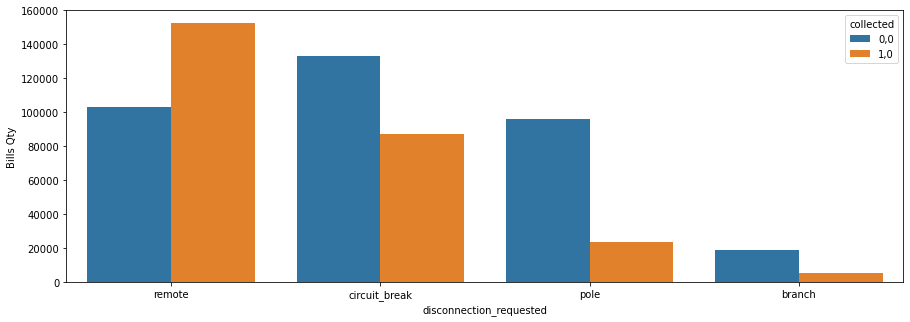

In [27]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='disconnection_requested',hue = 'collected',
                data=dataset,
                order=dataset['disconnection_requested'].value_counts().index)
graph.set_xlabel('disconnection_requested')
graph.set_ylabel('Bills Qty')

How the data of disconnection execution is most important, the data of disconnection resquested don't have relevance to model decision 

Text(0, 0.5, 'Bills Qty')

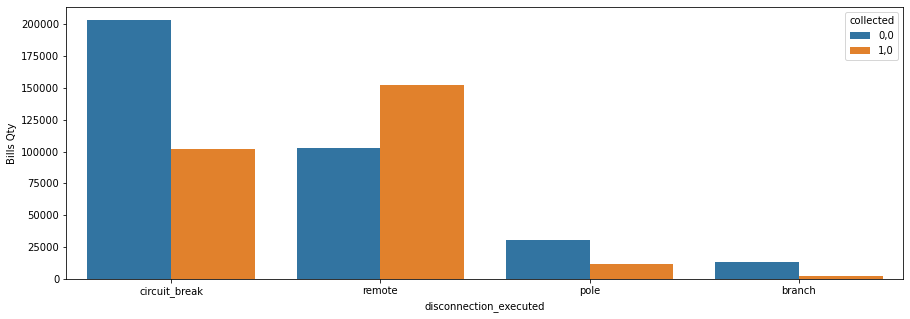

In [28]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='disconnection_executed',hue = 'collected',
                data=dataset,
                order=dataset['disconnection_executed'].value_counts().index)
graph.set_xlabel('disconnection_executed')
graph.set_ylabel('Bills Qty')

In [29]:
dataset['disconnection_executed_num'] =  dataset['disconnection_executed'].map({"circuit_break":"4","pole":"3", "branch":"2","remote":"1"}).astype(int)

Text(0, 0.5, 'Bills Qty')

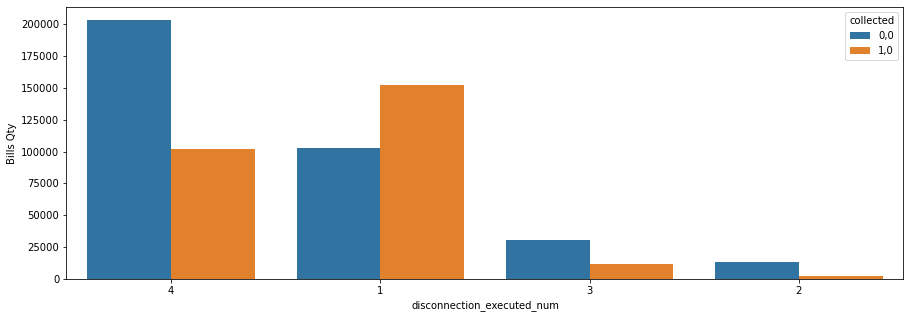

In [30]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='disconnection_executed_num',hue = 'collected',
                data=dataset,
                order=dataset['disconnection_executed_num'].value_counts().index)
graph.set_xlabel('disconnection_executed_num')
graph.set_ylabel('Bills Qty')

##### increasing order of complexity and aggressiveness:

###### 4 - circuit break
###### 3 - pole
###### 2 - branch
###### 1 - remote

#### less  complexity and aggressiveness is better

### 1.6.3 total bills data

Text(0, 0.5, 'Bills Qty')

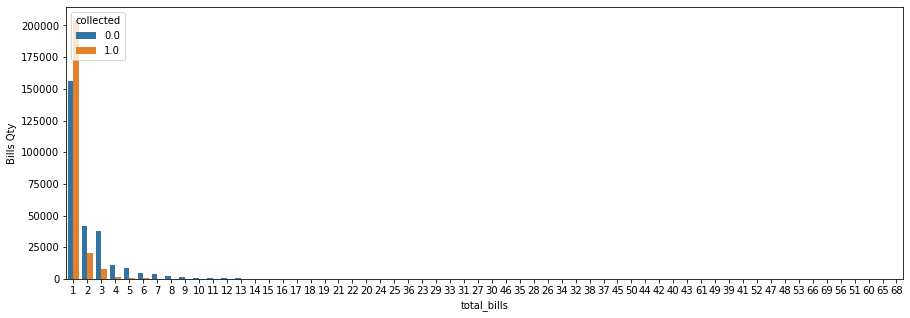

In [53]:
plt.figure(figsize=(15,5))
graph=sns.countplot(x='total_bills',hue = 'collected',
                data=dataset,
                order=dataset['total_bills'].value_counts().index)
graph.set_xlabel('total_bills')
graph.set_ylabel('Bills Qty')

### 1.5 binary data

In [32]:
#This is a binary condition 
dataset['collected'].value_counts()

0,0    350230
1,0    268116
Name: collected, dtype: int64

This is a binary condition and the most important value to machine learning

## 1.6 continuous data

### 1.6.1 Substuing "," by "."

In [58]:
dataset['collected'] = dataset['collected'].replace(",",".",regex=True).astype(float)
dataset['installment_value'] = dataset['installment_value'].replace(",",".",regex=True).astype(float)
dataset['total_debt'] = dataset['total_debt'].replace(",",".",regex=True).astype(float)
dataset['disconnection_date'] = pd.to_datetime(dataset['disconnection_date'])

### 1.6.2 intasllment data

In [34]:
dataset['installment_value'].replace(",",".",regex=True)

0          252.39
1            0.00
2            0.00
3         1317.25
4         2172.29
           ...   
618341       0.00
618342       0.00
618343     360.45
618344     665.38
618345     387.36
Name: installment_value, Length: 618346, dtype: float64

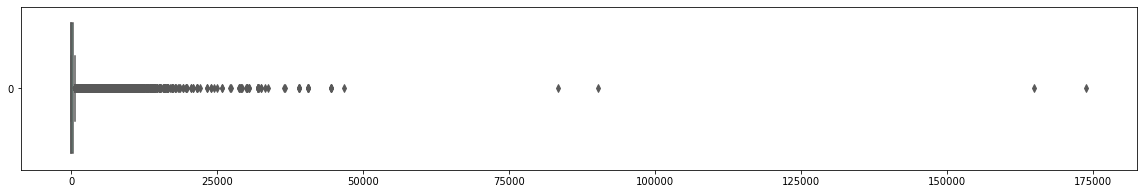

In [35]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["installment_value"].replace(",",".",regex=True), orient="h", palette="Set2")

(0.0, 1000.0)

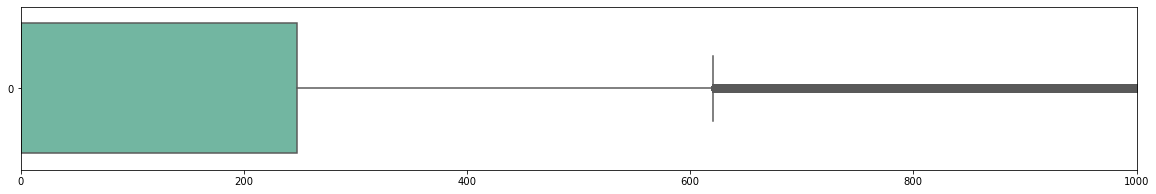

In [36]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["installment_value"].replace(",",".",regex=True), orient="h", palette="Set2")
plt.xlim(0, 1000)

In [37]:
dataset["installment_value"] = dataset["installment_value"].replace(",",".",regex=True)

In [38]:
#cleaning outliers
dataset.drop(dataset[dataset.installment_value > 600].index,axis =0, inplace = True)

### 1.6.3 total debt data

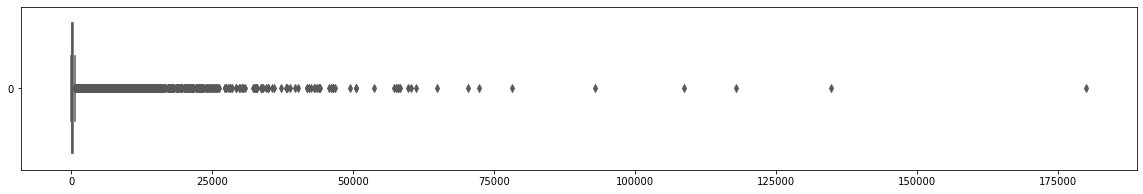

In [39]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["total_debt"].replace(",",".",regex=True), orient="h", palette="Set2")

(0.0, 1000.0)

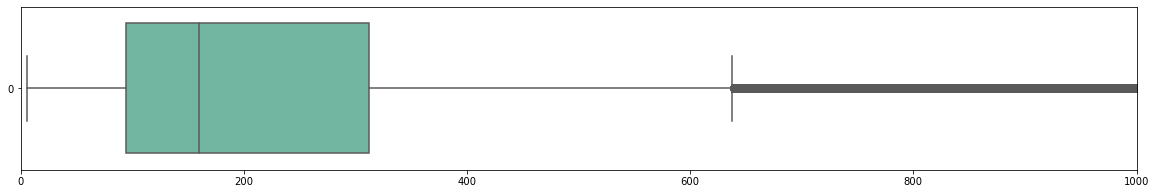

In [40]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(data=dataset["total_debt"].replace(",",".",regex=True), orient="h", palette="Set2")
plt.xlim(0, 1000)

In [41]:
#cleaning outliers
dataset.drop(dataset[dataset.total_debt > 650].index,axis =0, inplace = True)

In [42]:
dataset.head()

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected,connection_type_num,connection_status_num,installment_status_num,disconnection_executed_num
2,2,1,12380,1,1,biphasic connection,disconnected,0.00,Not Aplicabble,352.56,1,2017-03-20,circuit_break,"20,0",circuit_break,0.0,2,0,0,4
5,5,3,32281,3,1,single-phase connection,disconnected,295.55,current,160.90,1,2017-03-31,circuit_break,"189,0",circuit_break,0.0,1,0,1,4
10,10,2,22271,1,1,single-phase connection,disconnected,0.00,Not Aplicabble,339.43,1,2017-03-17,pole,"166,0",pole,0.0,1,0,0,3
11,11,3,32281,1,1,single-phase connection,disconnected,0.00,Not Aplicabble,462.50,3,2017-03-31,circuit_break,"189,0",circuit_break,0.0,1,0,0,4
12,12,4,42401,1,1,biphasic connection,connected,0.00,Not Aplicabble,226.39,1,2017-03-22,circuit_break,"272,0",circuit_break,1.0,2,1,0,4


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508100 entries, 2 to 618345
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   client_id                   508100 non-null  int64         
 1   regional                    508100 non-null  int64         
 2   site                        508100 non-null  int64         
 3   client_class                508100 non-null  int64         
 4   client_subclass             508100 non-null  int64         
 5   connection_type             508100 non-null  object        
 6   connection_status           508100 non-null  object        
 7   installment_value           508100 non-null  float64       
 8   installment_status          508100 non-null  object        
 9   total_debt                  508100 non-null  float64       
 10  total_bills                 508100 non-null  int64         
 11  disconnection_date          508100 non-

## 1.7 Date 

<Figure size 3600x216 with 0 Axes>

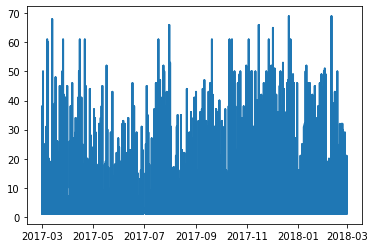

<Figure size 3600x216 with 0 Axes>

In [86]:
fig, ax = plt.subplots()
ax.plot(dataset['disconnection_date'],dataset['total_bills'], linewidth=2.0)
plt.figure(figsize=(50,3))

# 2. Correlating Data

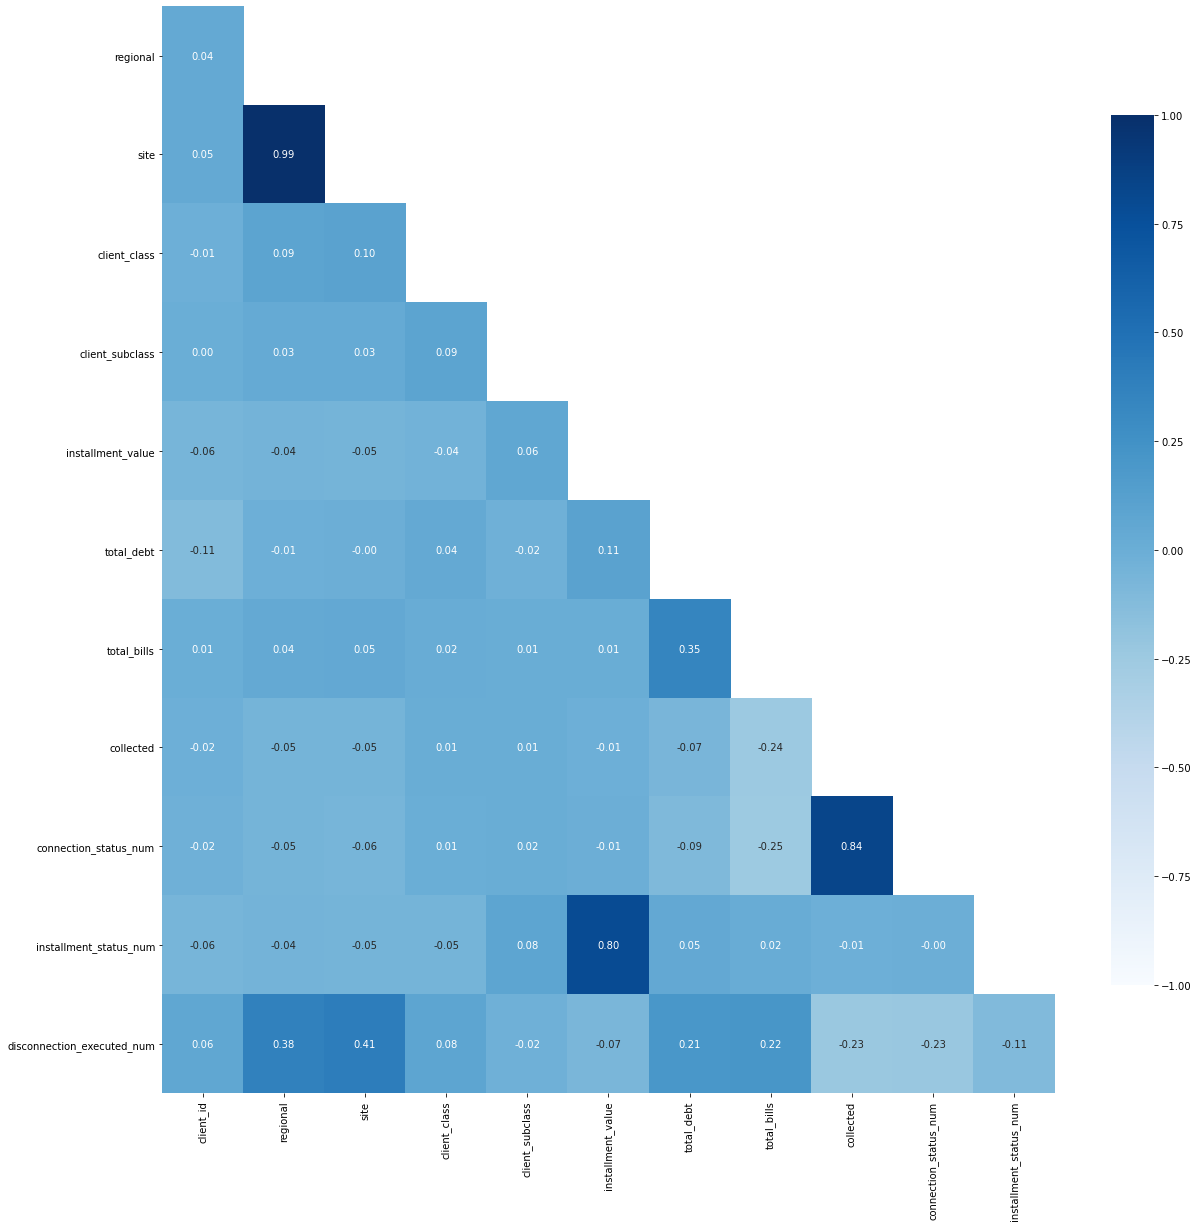

In [44]:
# PEARSON CORRELATION

f,ax=plt.subplots(figsize=(dataset.shape[1],dataset.shape[1]))
df_corr = dataset.corr(method = "pearson")
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#print(mask)
mask = mask[1:,:-1]
#print(mask)
corr = df_corr.iloc[1:,:-1].copy()
#print(corr)
sns.heatmap(corr, mask=mask,annot=True,fmt=".2f", cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink":.8})
plt.show()

<AxesSubplot:>

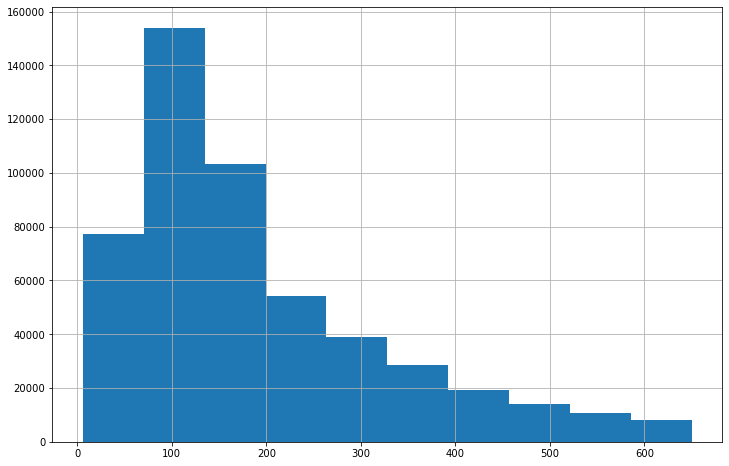

In [45]:
dataset.query("total_debt<300000").total_debt.hist(figsize=(12,8),histtype='stepfilled')
#plt.ylim(0, 3000)

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508100 entries, 2 to 618345
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   client_id                   508100 non-null  int64         
 1   regional                    508100 non-null  int64         
 2   site                        508100 non-null  int64         
 3   client_class                508100 non-null  int64         
 4   client_subclass             508100 non-null  int64         
 5   connection_type             508100 non-null  object        
 6   connection_status           508100 non-null  object        
 7   installment_value           508100 non-null  float64       
 8   installment_status          508100 non-null  object        
 9   total_debt                  508100 non-null  float64       
 10  total_bills                 508100 non-null  int64         
 11  disconnection_date          508100 non-

People with less bill and debt tends pay more than who have more bills, and intallment_value do not have relevance

# Summary 

(1) - Initial Data Analysis


A. Exploratory Data Analysis

– 1. Read, clean and explore the received data. Explain each step and
why.

Steps: 
(1) undestanding all datas, to take decisions about importance and redundance
(2) manipulating the data  
(3) substituing null datas 
(4) transform categorical data in int value.
(5) droping outliers
 
– 2. What’s the distribution for customer total debt variable? Draw a
histogram. How should you group this variable?	

The distribution is fisher distribution, where 

– 3. Analyze the “collected” variable correlating it to separate variables.
Plot this information.

B. Feature selection

– 1. Select the top 3-6 variables you consider that may be most
important for root-cause analysis. Explain your considerations.
1° collected, because is the principal information to understand if the debt was paid.
2° disconnection_executed, understand if the method was efficient.
3° total_debt, unsderstand how much is the cost of the debt, how the debt increase, the chance of this debt do not be paid increase too.
4° regional, we can see difference in bad debt collected by region.
5° total_bills, how the bills increase the chance of bad debt don't be payed increase too.

– 2. Are there any kind of preprocessing needed for these variables? Do
that if so.
In Categorical data, is necessary transform strings in number, so the best decision is creat a new columns, with numbers correspondents.


(2) - Model development and evaluation


A. Model selection
– 1. How do you select a Machine Learning model for this task? What
kind of variable are you predicting? Select at least 3 different models.

Selecting a machine learning model: 
1° - Search what exist, search in blogs and articles to see if a model was developed to same task.
2° - Avaliation of data base, to understand if algorithm process this kind of data is efficiently.
3° - Selection of a performance method to avaliate the model.

I am trying to predict a binary variable, understanding if the disconnection executed was efficient. 

LGBM, probabily the best model, because is based in multiples tree evaluations.
Logistic regression, good to predict binary variables.
Random forest, could be sufficient, is like LGBM, but more simple.

– 2. What are the best hyperparameters for these models? Implement a
hyperparameters tuning algorithm.


– 3. Create train-test splits for your data and implement a cross
validation methodology for later evaluation.


B. Model evaluation


– 1. Which metrics can be used to evaluate the models’ performance?
Select at least 4 and explain their meaning briefly. Select the most
appropriate one for model comparison.


– 2. Based on the cross validation in the training set, which model was
more accurate?


– 3. Generate predictions for the test split for the best model. Join your
predictions with the original info and save a file named
“[CANDIDATE_NAME]_PREDICTIONS.CSV”. How much is the
success rate for this set?


– 4. Which variables were most important for this result? Calculate any
kind of feature importance metric.


(3) Business sense and technical background


A. Business sense
– 1. Describe how the client could use the model to improve its debt
collection strategy.

Creating parameters to decide what kind of disconnection will be executed, to improve the results.

– 2. Which additional data you think would most add predictive power to
the model? Explain why.

Executionn cost, to have a better avaliation of perfomace and date between execution and payment, to undetand if payment was made becouse of disconnection or other cause.

– 3. How would you access this data?

With SQL, in a relational data base.

B. Technical background
– 1. How do you avoid overfitting and underfitting in this problem?

Cross-validation
Train with more data
Data augmentation
Reduce Complexity or Data Simplification

– 2. Explain shortly how you would transfer your model to the client’s IT
Department. (Hint: DevOps)

1 - Meeting to comunicate and show the conclusion.
2 - Develop a documentation about library and versions used to develop this model.
3 - Develop a instruction with the steps of development.
4 - Sed to client. 